In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping

data = tf.keras.utils.image_dataset_from_directory('data', image_size= (256, 256), batch_size= 32, shuffle= True)

train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.1)
test_size = int(len(data) * 0.2)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

train = train.map(lambda x, y: (x/255, y))
val = val.map(lambda x, y: (x/255, y))
test = test.map(lambda x, y: (x/255, y))

train_size, val_size, test_size  # numbers of batchs not images  

Found 305 files belonging to 2 classes.


(7, 1, 2)

In [2]:
model = Sequential()

model.add(Conv2D(64, (3, 3), 1, activation= "relu", input_shape= (256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation= "relu"))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation= "relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation= "relu")) 
model.add(Dropout(0.3))
model.add(Dense(1, activation= "sigmoid"))


model.compile(optimizer= "adam", loss= tf.losses.BinaryCrossentropy(), metrics= ["accuracy"])
model.summary()

callback = EarlyStopping(monitor= "val_loss", patience= 5, restore_best_weights= True)

history = model.fit(train, epochs= 20, validation_data= val, callbacks= [callback])

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,711,793 (14.16 MB)

 Trainable params: 3,711,793 (14.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 654ms/step - accuracy: 0.4777 - loss: 0.8226 - val_accuracy: 0.5625 - val_loss: 0.6629
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 624ms/step - accuracy: 0.5714 - loss: 0.6760 - val_accuracy: 0.6562 - val_loss: 0.6226
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 629ms/step - accuracy: 0.6339 - loss: 0.6332 - val_accuracy: 0.7500 - val_loss: 0.5270
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 651ms/step - accuracy: 0.6964 - loss: 0.5982 - val_accuracy: 0.8438 - val_loss: 0.4339
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 694ms/step - accuracy: 0.7366 - loss: 0.5320 - val_accuracy: 0.8125 - val_loss: 0.5590
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 701ms/step - accuracy: 0.7545 - loss: 0.4875 - val_accuracy: 0.7500 - val_loss: 0.4015
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 729ms/step - accuracy: 0.7991 - loss: 0.4613 - val_accuracy: 0.8438 - val_loss: 0.4175
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 754ms/step - accuracy: 0.8482 - loss: 0.3699 - val_accuracy: 0.8125 - val_loss:

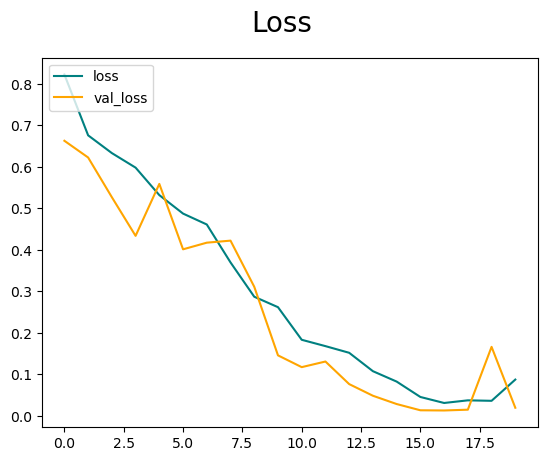

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

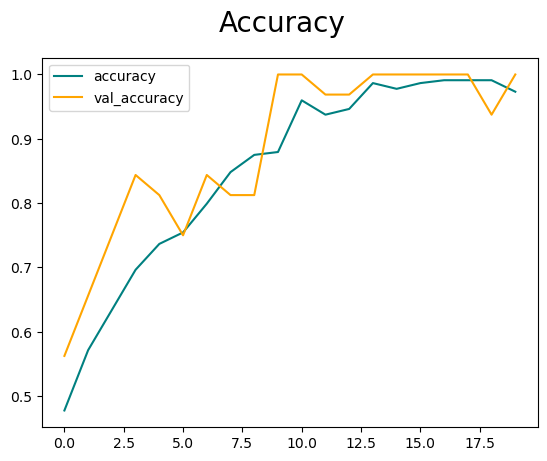

In [4]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [5]:
test_loss, test_acc = model.evaluate(test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9796 - loss: 0.0410 


In [6]:
model.save("img.h5")

In [7]:
import tensorflow as tf
from tensorflow.keras.models import load_model

new_model = load_model("img.h5")

In [8]:
import cv2
import numpy as np

img_1 = "154006829.jpg" # happy
img_2 = "8iAb9k4aT.jpg" # sad

img = cv2.imread(img_2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (256,256))
resize = resize.numpy()

y_pred = new_model.predict(np.expand_dims(resize/255, 0))

if y_pred[0] > 0.5:
    print("Sad")
else:
    print("Happy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Sad


In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image

img = image.load_img(img_1, target_size= (256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis= 0)

processed_img = img_array / 255.0

prediction = new_model.predict(processed_img)

if prediction[0][0] > 0.5:
    print("Sad")
else:
    print("Happy")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Happy


In [10]:
cap = cv2.VideoCapture(0)

print("Press SPACE to take photo...")

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    cv2.imshow("Camera", frame)
    key = cv2.waitKey(1)
    
    if key == 32:
        cv2.imwrite("captured.jpg", frame)
        print("Photo saved!")
        break

    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

Press SPACE to take photo...
Photo saved!


In [11]:
img = cv2.imread("captured.jpg")
resize = tf.image.resize(img, (256,256))
resize = resize.numpy()
prediction = new_model.predict(np.expand_dims(resize/255, 0))

if prediction[0][0] < 0.5:
    label = "Happy"
else:
    label = "Sad"

print("Prediction:", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction: Sad


In [12]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_smile.xml")

img = cv2.imread("captured.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)

    if len(smiles) > 0:
        label = "Happy"
        color = (0, 255, 0)
    else:
        label = "Sad"
        color = (0, 0, 255)

    cv2.putText(img, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

cv2.imshow("Emotion Detection", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

print("Prediction:", label)

Prediction: Sad
